<h1><center>Linear Regression: Prediction on the Cost of Security Incident<center/></h1>

<hr>
<br>
<br>
<br>



 This exercise explains the basic fundamentals of linear regression applied to a simple use case related to Cybersecurity.

<br>
<br>

## Excercise statement
<br>
<li>The exercise consists of predicting the cost of a security incident based on the number of computers that have been affected.</li>
<br>
<li>The data set is randomly generated.</li>

### 1. Generation of the data set

In [22]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

print(f'The lenght of the data set is {len(X)}')

The lenght of the data set is 100


### 2. Visualization of the data set

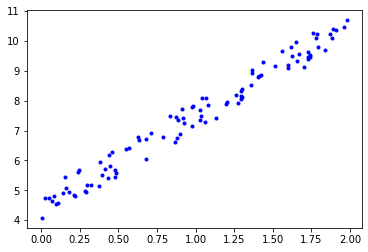

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.plot(X, y, 'b. ')
# Show the graph
plt.show()

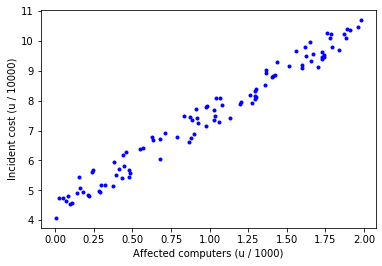

In [24]:
# Plot the graph
plt.plot(X, y, 'b. ')
# Naming the horizontal axis
plt.xlabel ("Affected computers (u / 1000)")
# Naming the vertical axis
plt.ylabel ("Incident cost (u / 10000)")
# Show the graph
plt.show()


### 3. Modification of the data set

In [4]:
import pandas as pd

data = {'n_equipments_affected': X.flatten (), 'cost': y.flatten ()}
# Creating a dataframe
df = pd.DataFrame (data) 
# Viewing the first 10 data of the dataframe
df.head (10)

,n_equipments_affected,cost
0,1.529128,9.065531
1,1.248514,8.084057
2,0.267810,5.356412
3,0.819589,6.888220
4,0.532904,6.338912
5,0.655857,6.700973
6,1.979557,10.592712
7,0.043554,4.916204
8,0.560762,6.619448
9,1.617746,9.160170


In [7]:
# Scaling the number of affected computers 
df['n_equipments_affected'] = df['n_equipments_affected'] * 1000 
df['n_equipments_affected'] = df['n_equipments_affected']. astype('int')
# Scaling the cost of computers 
df['cost'] = df['cost'] * 10000 
df['cost'] = df['cost']. astype('int')
df.head()


,n_equipments_affected,cost
0,1529,90655
1,1248,80840
2,267,53564
3,819,68882
4,532,63389


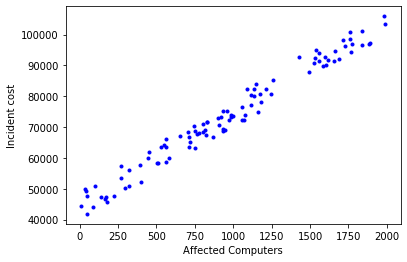

In [9]:
# Graphical representation of the data set 
plt.plot(df['n_equipments_affected'], df['cost'], "b.")
plt.xlabel("Affected Computers")
plt.ylabel("Incident cost") 
plt.show()

### 4. Construction of the model

In [11]:
# Import the model
from sklearn.linear_model import LinearRegression
# Construction of the model and adjustment of the hypothesis function 
lin_reg = LinearRegression() 
# Training the model
lin_reg.fit(df['n_equipments_affected'].values.reshape(-1, 1), df ['cost']. values)

LinearRegression()

In [12]:
# Parameter theta 0
lin_reg.intercept_

44673.036212053106

In [26]:
# Parameter theta 1
lin_reg.coef_

array([29.83191886])

In [27]:
# Prediction for the minimum and maximum value of the training data set
X_min_max = np.array([[df["n_equipments_affected"].min()], [df["n_equipments_affected"].max()]]) 
y_train_pred = lin_reg.predict (X_min_max)

### 5. Prediction of new examples

In [30]:
x_new = np.array([[1300]]) # 1300 computers affected

# Prediction of the cost of the incident
cost = lin_reg.predict(x_new)

print(f'The cost of the incident would be : ${int(cost[0])} ')

The cost of the incident would be : $83454 


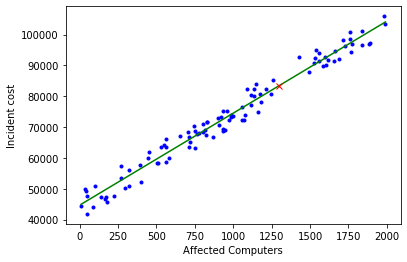

In [32]:
plt.plot(df['n_equipments_affected'], df['cost'], "b.") 
plt.plot (X_min_max, y_train_pred, "g-") 
plt.plot(x_new, cost, "rx")
plt.xlabel ("Affected Computers") 
plt.ylabel ("Incident cost") 
plt.show ()